In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import numpy as np
import requests
import json
import os
import datetime


In [2]:
r = requests.get('https://httpbin.org/user-agent')
useragent = json.loads(r.text)['user-agent']
headers = {'User-agent': useragent}

# Get URL for hourly forecast data

url = f"https://api.weather.gov/points/{37},{-81}"
r = requests.get(url, headers = headers)
print(r)
myjson = json.loads(r.text)
df1 = pd.json_normalize(myjson['properties'])
df1
hourlyURL = df1['forecastGridData'].iloc[0]   
print(hourlyURL)
# # Obtain actual hourly forecast data

r = requests.get(hourlyURL, headers = headers)
print(r)
myjson = json.loads(r.text)
df1 = pd.json_normalize(myjson['properties']['skyCover']['values'])


<Response [200]>
https://api.weather.gov/gridpoints/RNK/38,53
<Response [200]>


In [3]:
df1

,validTime,value
0,2024-07-24T20:00:00+00:00/PT1H,68
1,2024-07-24T21:00:00+00:00/PT1H,43
2,2024-07-24T22:00:00+00:00/PT1H,33
3,2024-07-24T23:00:00+00:00/PT1H,10
4,2024-07-25T00:00:00+00:00/PT1H,74
...,...,...
153,2024-08-01T17:00:00+00:00/PT1H,54
154,2024-08-01T18:00:00+00:00/PT1H,56
155,2024-08-01T19:00:00+00:00/PT1H,59
156,2024-08-01T20:00:00+00:00/PT1H,61


In [4]:
df1['validTime'] = df1['validTime'].str.extract(r'^(.*?)/')

# Convert the extracted start time to datetime
df1['validTime'] = pd.to_datetime(df1['validTime'])

In [5]:
df1

,validTime,value
0,2024-07-24 20:00:00+00:00,68
1,2024-07-24 21:00:00+00:00,43
2,2024-07-24 22:00:00+00:00,33
3,2024-07-24 23:00:00+00:00,10
4,2024-07-25 00:00:00+00:00,74
...,...,...
153,2024-08-01 17:00:00+00:00,54
154,2024-08-01 18:00:00+00:00,56
155,2024-08-01 19:00:00+00:00,59
156,2024-08-01 20:00:00+00:00,61


In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.plot(df1['value'])
plt.show()

C:\Users\shrof\AppData\Local\Temp\ipykernel_7132\3908856360.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [8]:
fig = plt.figure(figsize=(8,6),facecolor='white')
ax = fig.add_subplot()

plt.plot(df1['validTime'],df1['value'], label = 'Ram (Gb)')

ax.set_xlabel('RAM (GB)', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Histogram of Ram (GB) for 2021-2024 MSDS Cohort',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize = 14)



(array([19929., 19930., 19931., 19932., 19933., 19934., 19935., 19936.,
        19937.]),
 [Text(19929.0, 0, '2024-07-25'),
  Text(19930.0, 0, '2024-07-26'),
  Text(19931.0, 0, '2024-07-27'),
  Text(19932.0, 0, '2024-07-28'),
  Text(19933.0, 0, '2024-07-29'),
  Text(19934.0, 0, '2024-07-30'),
  Text(19935.0, 0, '2024-07-31'),
  Text(19936.0, 0, '2024-08-01'),
  Text(19937.0, 0, '2024-08-02')])

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df1 is your DataFrame and 'validTime' is already in datetime format

fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = fig.add_subplot()

# Plot the data
ax.plot(df1['validTime'], df1['value'], label='Ram (Gb)')

# Formatting the x-axis to display datetime values properly
ax.xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to every day
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Set minor ticks to every 6 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format major tick labels

# Rotate the x-axis labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Set labels and title
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_title('Time Series Data', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Show the legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\shrof\AppData\Local\Temp\ipykernel_7132\865095387.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


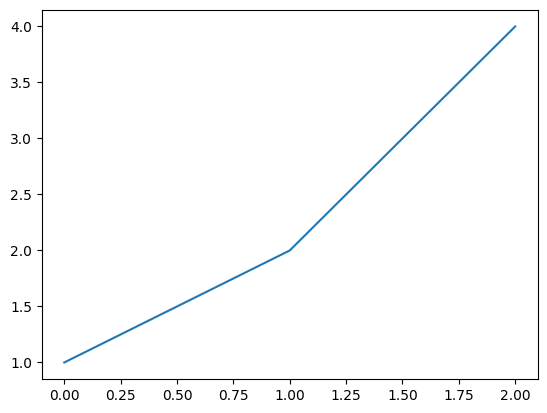

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
a = np.array([1,2,4])
plt.plot(a)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([1,2,3])
plt.plot(a)